# Mushroom Classification Project

### Date: 04/05/2025
### Author: Cera Drake

##### Introduction: I am using the mushroom data set, and will predict whether a mushroom is poisonous or edible based on certain characteristics

In [110]:
# Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

#### Section 1.1 Import Dataset

In [111]:
# Import dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
df = pd.read_csv(url, header=None)
print(df.head())

  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]


In [112]:
# Add column names to the data 
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df.columns = columns
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [113]:
# Check for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [114]:
# Summary Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### Reflection 1: This data set has over 8,000 entries with 23 different columns. There are no null values. The columns are all object types, the features have a different letter representation. 

##### Section 2: Data Exploration and Preparation

##### 2.1 Explore Data Patterns and Distributions

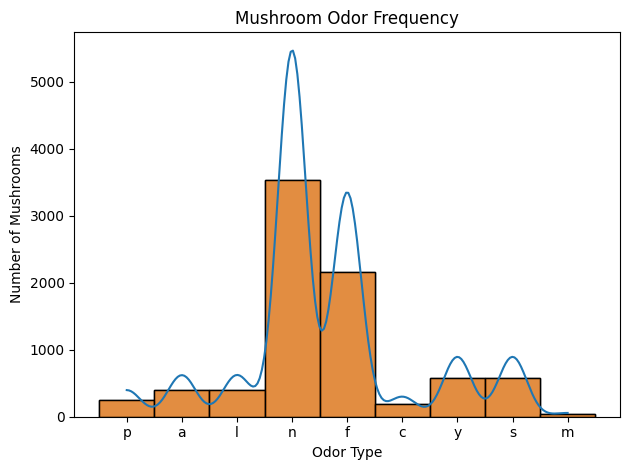

In [115]:
# Create Histogram
sns.histplot(df['odor'], kde=True)
plt.title('Mushroom Odor Frequency')
plt.xlabel('Odor Type')
plt.ylabel('Number of Mushrooms')
odor_labels = {
    'a': 'Almond', 'l': 'Anise', 'c': 'Creosote', 'y': 'Fishy',
    'f': 'Foul', 'm': 'Musty', 'n': 'None', 'p': 'Pungent', 's': 'Spicy'
}

sns.histplot(df['odor'], kde=False)
plt.tight_layout()
plt.show()

In [116]:
# No box plot for this data set becuase all of the features are letters and not numerical

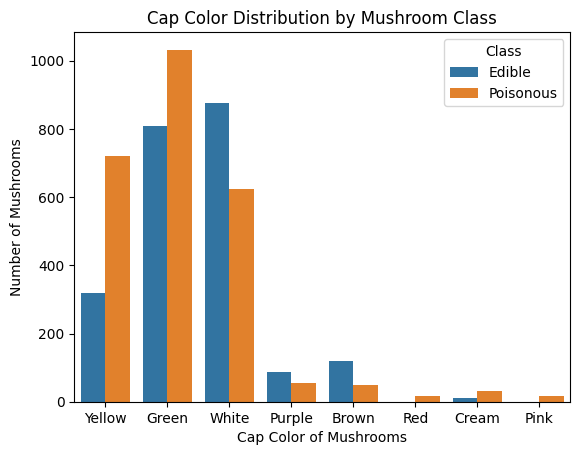

In [128]:
# Countplot for Cap Color
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='cap-color', hue='class', data=df)
plt.title('Cap Color Distribution by Mushroom Class')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xlabel('Cap Color of Mushrooms')
plt.ylabel('Number of Mushrooms')
cap_color_map = {
    'b': 'Brown', 'c': 'Cream', 'x': 'Cinnamon', 'f': 'Gray',
    'g': 'Green', 'r': 'Pink', 'p': 'Purple', 'u': 'Red',
    'e': 'White', 'w': 'Yellow'
}

df['cap-color'] = df['cap-color'].map(cap_color_map)
plt.show()

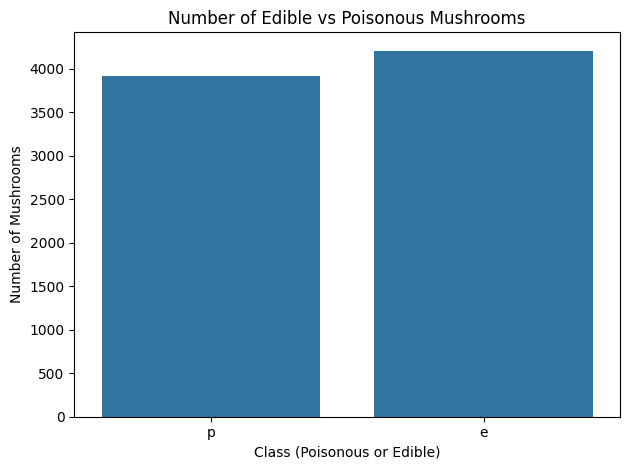

In [118]:
# Countplot for Edible vs Poisonous Mushrooms
sns.countplot(x='class', data=df)

plt.title('Number of Edible vs Poisonous Mushrooms')
plt.xlabel('Class (Poisonous or Edible)')
plt.ylabel('Number of Mushrooms')

plt.tight_layout()
plt.show()

#### 2.2 Handle missing values and clean data
###### Impute or drop missing values (as applicable).
###### Remove or transform outliers (as applicable).
###### Convert categorical data to numerical format using encoding (as applicable).

In [119]:
# Count the number of '?' in the 'stalk-root' column
stalk_root_count = df['stalk-root'].value_counts().get('?', 0)
print(f"Number of '?' in 'stalk-root' column: {stalk_root_count}")

Number of '?' in 'stalk-root' column: 2480


###### Replace '?' in the Stalk-Root Column with 'Unknown'k

In [120]:
# Replace '?' with 'Unknown' in the 'stalk-root' column
df['stalk-root'] = df['stalk-root'].replace('?', 'Unknown')
print(df['stalk-root'].value_counts())

stalk-root
b          3776
Unknown    2480
e          1120
c           556
r           192
Name: count, dtype: int64


#### 2.3 Feature Selection and Engineering
##### Feature Engineering

In [121]:
# Combine 2 Features (Cap-Color and Odor)
df['odor_cap_combined'] = df['odor'] + '_' + df['cap-color']

##### Reflection 2: The 'Stalk-Root' column contained some '?', which I changed to 'unknown'. I also combined the features 'odor' and 'cap-color' because they can be 2 big indicators of poisonous or edible. 

#### Section 3. Feature Selection and Justification

##### 3.1 Choose features and target
##### The target is 'class', because it has the categories 'edible' and 'poisonous'. The features that I will use are 'odor' and 'gill-color', because both have a strong correlation in defining if a mushroom is poisonous or edible

##### 3.2 Define X and y

In [122]:
X = df[['odor', 'gill-color']]
y = df['class'].map({'e': 0, 'p': 1})

###### Reflection 3: Specific odors are a strong indicator of a poisonous mushroom. Gill color has shown correlation to differentiating poisonous or edible. I left out other variables that aren't as indicative to reduce the amount of data/ noise in the models. 

#### Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

In [123]:
# 4.1 Split the Data
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# Encode the categorical features because it is expecting numerical
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

In [124]:
# Train the model - Decision Tree
# Evaluate Performance - Classification Report, Confusion Matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1263    0]
 [  28 1147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1263
           1       1.00      0.98      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



###### Reflection 4: The model performed really well. 1263 edible mushrooms were correctly predicted. 1147 poisonous mushrooms were correctly predicted. There were only 28 mushrooms that were predicted to be edible, but were actually poisonous. Overall the model was 99% accurate. 

#### Section 5. Improve the Model or Try Alternates (Implement a Second Option)
##### Train a Random Forest Model


In [125]:
# Create and Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier(random_state=42)
randomforest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [126]:
y_pred = randomforest_model.predict(X_test)

In [127]:
# Evaluate the Random Forest model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

Confusion Matrix:
[[1263    0]
 [  28 1147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1263
           1       1.00      0.98      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438


Accuracy: 0.9885


##### Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case? The models performed the same. This may be because I used the same splits and encoded features for both models. 


##### Final Thoughts: This data set did not require very much cleaning, so it made it a lot easier for me to use. I think if I were to continue, I would want to add in more variables that could be predictors of poisonous vs. edible and expand on that. I would want to use all models and create more visuals to compare the features. 